In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [76]:
train = pd.read_csv('/content/gdrive/MyDrive/Loan Data/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Loan Data/test.csv')
train_2 = train.copy()
test_2 = test.copy()


In [30]:
#train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

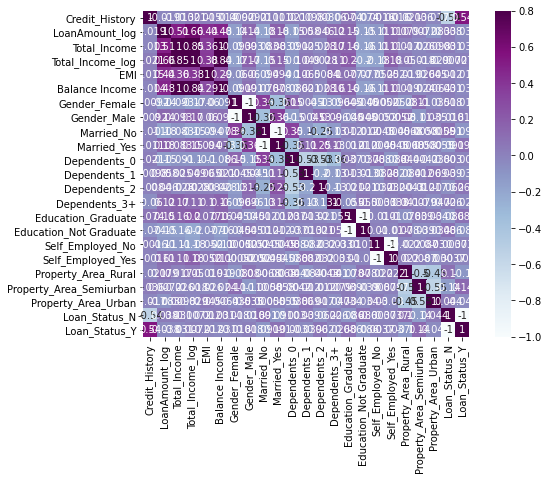

In [72]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu', annot = True)

In [77]:
#PREPARE THE DATA

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [78]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

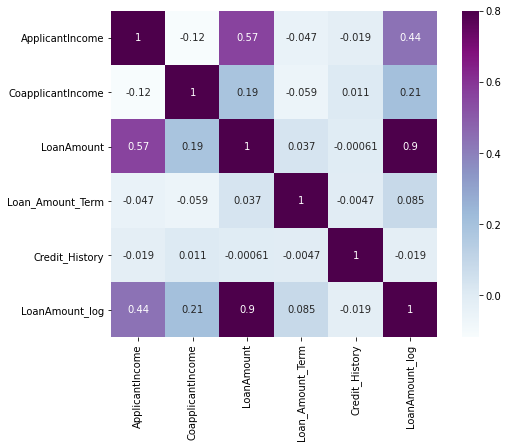

In [79]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log']=np.log(test['LoanAmount'])

matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu', annot = True)

In [61]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['Total_Income_log'] = np.log(train['Total_Income'])
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']

test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['Total_Income_log'] = np.log(test['Total_Income'])
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)

train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)


train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

X = train.drop('Loan_Status',axis=1)
Y = train.Loan_Status

X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [37]:
#USING RANDOM FOREST CLASSIFIER

x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size=0.3)
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)
s1 = accuracy_score(y_cv,pred_cv)
print(s1)

0.8162162162162162


In [38]:
pred_test = model.predict(test)
print(pred_test)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y

In [49]:
final = pd.read_csv('/content/gdrive/MyDrive/Loan Data/final.csv')
final.head()

,Loan_ID,Loan_Status


In [50]:
final['Loan_Status'] = pred_test
final['Loan_ID'] = test_2['Loan_ID']
final.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [62]:
#USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model2 = LogisticRegression()
model2.fit(x_train, y_train)
pred_cv2 = model2.predict(x_cv)
s2 = accuracy_score(y_cv,pred_cv2)
print(s2)

0.827027027027027


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
#USING DECISION TREE
from sklearn import tree
model3 = tree.DecisionTreeClassifier(random_state=1)
model3.fit(x_train, y_train)
pred_cv3 = model3.predict(x_cv)
s3 = accuracy_score(y_cv,pred_cv3)
print(s3)

0.7297297297297297


In [67]:
#USING XGBOOST
from xgboost import XGBClassifier
model4 = XGBClassifier(n_estimators=45, max_depth=3) 
model4.fit(x_train, y_train)
pred_cv4 = model4.predict(x_cv)
s4 = accuracy_score(y_cv,pred_cv4)
print(s4)

0.8216216216216217


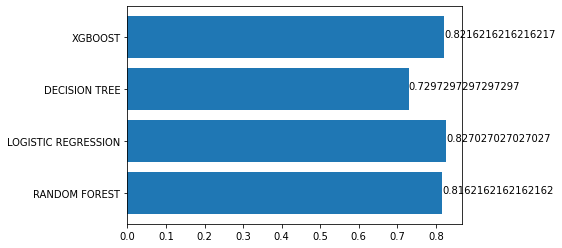

In [69]:
u = ["RANDOM FOREST", "LOGISTIC REGRESSION", "DECISION TREE", "XGBOOST"]
v =  [s1,s2,s3,s4]
plt.barh(u, v)
for index, value in enumerate(v):
    plt.text(value, index, str(value))